<a href="https://colab.research.google.com/github/Sreenidhikoricherla/SCT_ML_1/blob/main/house_prices_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


In [5]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'


In [8]:
features

['GrLivArea', 'BedroomAbvGr', 'FullBath']

In [9]:
data = data.dropna(subset=features + [target])


In [10]:
X = data[features]  # input columns
y = data[target]    # target column


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape


((1168, 3), (292, 3))

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()       # create the model
model.fit(X_train, y_train)      # train it using training data



LinearRegression()

In [14]:
y_pred = model.predict(X_test)
y_pred[:10]

array([113410.67255298, 305081.87775899, 135904.78562983, 205424.67564124,
       227502.68349004, 121157.48079629, 205577.98056584, 183787.20378269,
       121157.48079629, 147219.22233196])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)  # how well the model explains the data
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # error size

print("R² Score:", round(r2, 3))
print("RMSE:", round(rmse, 0))



R² Score: 0.634
RMSE: 52976.0


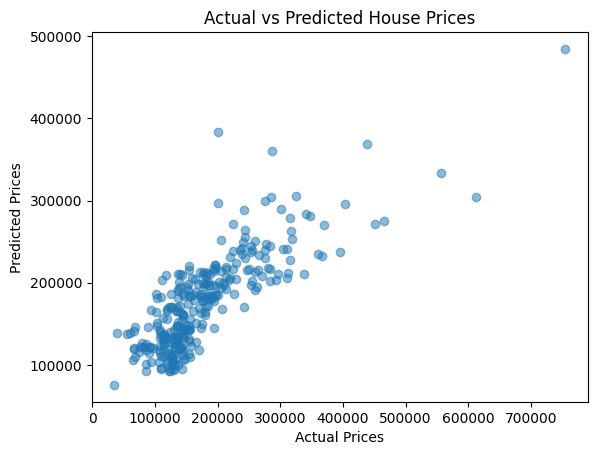

In [16]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


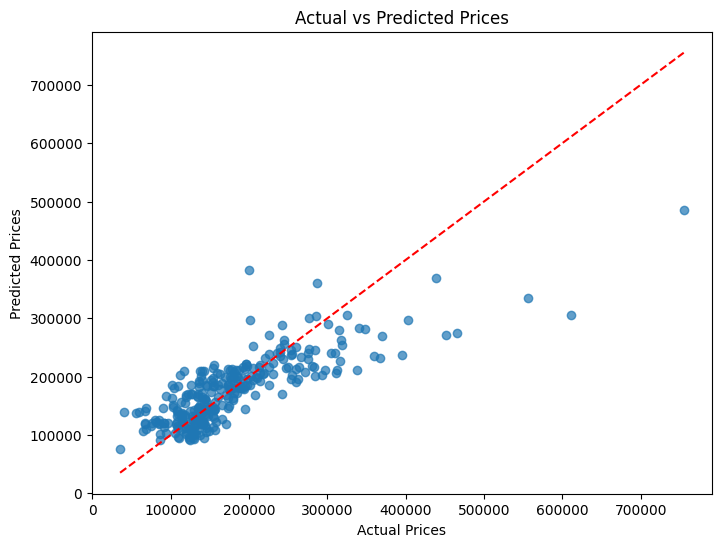

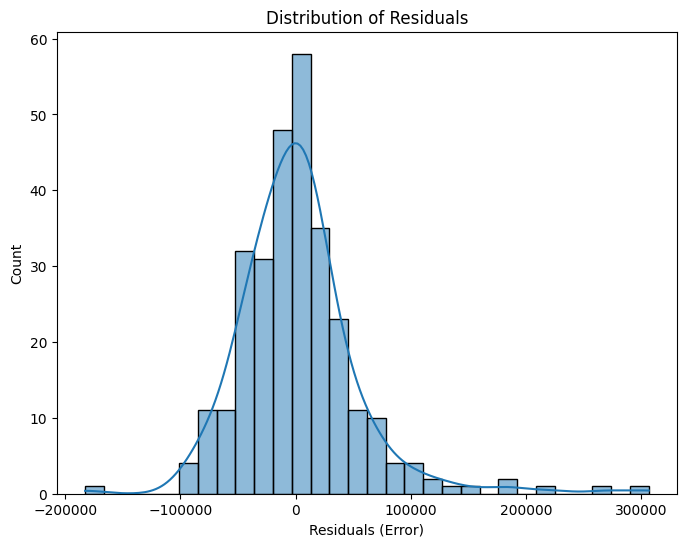

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# 2. Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals (Error)")
plt.title("Distribution of Residuals")
plt.show()





In [18]:
import joblib

# Save the trained model
joblib.dump(model, 'house_price_model.pkl')

print("Model saved as house_price_model.pkl")



Model saved as house_price_model.pkl
